In [1]:
from asgardpy.analysis import AsgardpyAnalysis
from asgardpy.config import AsgardpyConfig
from asgardpy.utils.plot import (
    plot_parameter_stat_profile,
    plot_spectrum_fp,
    plot_spectrum_model
)
from gammapy.modeling.models import Models, create_crab_spectral_model
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u

In [2]:
base_dir = "/fefs/aswg/workspace/chaitanya.priyadarshi/"
config_file = base_dir + "analyze_pg1553_full.yaml"
output_dir = base_dir + "real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/joint_fit/"

In [3]:
config = AsgardpyConfig()

In [4]:
config_main = config.read(config_file)

In [5]:
for g in config_main.general:
    print(g)

('log', LogConfig(level='info', filename=None, filemode=None, format=None, datefmt=None))
('outdir', '/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/joint_fit/')
('n_jobs', 1)
('steps', [<AnalysisStepEnum.datasets_3d: 'datasets-3d'>, <AnalysisStepEnum.datasets_1d: 'datasets-1d'>, <AnalysisStepEnum.fit: 'fit'>, <AnalysisStepEnum.flux_points: 'flux-points'>])
('overwrite', True)
('stacked_dataset', True)


# Steps mentioned in the main config file

In [6]:
config_main.general.steps

[<AnalysisStepEnum.datasets_3d: 'datasets-3d'>,
 <AnalysisStepEnum.datasets_1d: 'datasets-1d'>,
 <AnalysisStepEnum.fit: 'fit'>,
 <AnalysisStepEnum.flux_points: 'flux-points'>]

# Target source information

In [7]:
for c in config_main.target:
    print(c)

('source_name', 'PG1553+113')
('sky_position', SkyCoordConfig(frame=<FrameEnum.icrs: 'icrs'>, lon=<Angle 238.92934976 deg>, lat=<Angle 11.19010155 deg>))
('use_uniform_position', True)
('models_file', None)
('extended', False)
('components', SkyModelComponent(name='PG1553+113', type='SkyModel', spectral=SpectralModelConfig(model_name='LogParabola', type='LogParabolaSpectralModel', parameters=[ModelParams(name='amplitude', value=1e-05, unit='cm-2 s-1 TeV-1', error=1.5e-06, min=1e-13, max=0.01, frozen=False), ModelParams(name='reference', value=0.0015, unit='TeV', error=0.0, min=0.0001, max=100.0, frozen=True), ModelParams(name='alpha', value=1.5, unit='', error=0.1, min=0.5, max=5.0, frozen=False), ModelParams(name='beta', value=0.1, unit='', error=0.01, min=1e-06, max=1.0, frozen=False)], ebl_abs=EBLAbsorptionModel(model_name='dominguez', type='EBLAbsorptionNormSpectralModel', redshift=0.433, alpha_norm=1.0)), spatial=SpatialModelConfig(model_name=None, type=None, parameters=[ModelPara

# Datasets informations

In [8]:
for cc in config_main.dataset3d:
    print(cc)

('type', <ReductionTypeEnum.cube: '3d'>)
('instruments', [Dataset3DBaseConfig(name='Fermi-LAT', io=[InputConfig(type='lat', input_dir=PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola'), glob_pattern={'events': '*MkTime.fits*', 'edisp': '*eDRM.fits*', 'xml_model': '*out.xml', 'exposure': '*BinnedMap.fits*', 'psf': '*psf.fits*'}), InputConfig(type='lat-aux', input_dir=PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/diffuse_models'), glob_pattern={'diffuse': 'gll_iem_v07.fits*', 'iso': 'iso_P8R3_SOURCE_V3_*.txt'})], dataset_info=Dataset3DInfoConfig(name='Fermi-LAT', key=['FRONT', 'BACK'], map_selection=[<MapSelectionEnum.counts: 'counts'>, <MapSelectionEnum.exposure: 'exposure'>, <MapSelectionEnum.background: 'background'>, <MapSelectionEnum.psf: 'psf'>, <MapSelectionEnum.edisp: 'edisp'>], obs_time=TimeIntervalsConfig(format=<TimeFormatEnum.iso: 'iso'>, intervals=[TimeRangeConfig(start=<Time object: scale='utc' format='iso' value=2021-04-01 00:00:

In [9]:
for cc in config_main.dataset1d:
    print(cc)

('type', <ReductionTypeEnum.spectrum: '1d'>)
('instruments', [Dataset1DBaseConfig(name='LST-1', io=[InputConfig(type='lst-1', input_dir=PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931'), glob_pattern={'dl3': '202*/dl3*fits'})], dataset_info=Dataset1DInfoConfig(name='LST-1', geom=GeomConfig(wcs=WcsConfig(skydir=SkyCoordConfig(frame=None, lon=None, lat=None), binsize=<Angle 0.02 deg>, final_frame=FinalFrameConfig(width=<Angle 5. deg>, height=<Angle 5. deg>), binsize_irf=<Angle 0.2 deg>), selection=SelectionConfig(offset_max=<Angle 2.5 deg>), axes=EnergyAxesConfig(energy=EnergyAxisConfig(min=<Quantity 10. GeV>, max=<Quantity 10. TeV>, nbins=5), energy_true=EnergyAxisConfig(min=<Quantity 10. GeV>, max=<Quantity 10. TeV>, nbins=5))), observation=ObservationsConfig(obs_ids=[], obs_file=None, obs_time=TimeIntervalsConfig(format=<TimeFormatEnum.iso: 'iso'>, intervals=[TimeRangeConfig(start

In [10]:
for cc in config_main.fit_params:
    print(cc)

('fit_range', EnergyRangeConfig(min=<Quantity 100. MeV>, max=<Quantity 1. TeV>))
('backend', <BackendEnum.minuit: 'minuit'>)
('optimize_opts', {})
('covariance_opts', {})
('confidence_opts', {})
('store_trace', True)


In [11]:
analysis = AsgardpyAnalysis(config_main)

Setting logging config: {'level': 'INFO', 'filename': None, 'filemode': None, 'format': None, 'datefmt': None}


In [12]:
analysis

# Run all the steps

In [13]:
%%time
analysis.run()

1 number of 3D Datasets given
The different keys used: ['FRONT', 'BACK']
The list of DL3 event files for LAT selected: [PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_BACK_MkTime.fits.gz'), PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_FRONT_MkTime.fits.gz')]
The list of Detector Response Matrix files for LAT selected: [PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_BACK_LogParabola_eDRM.fits.gz'), PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_FRONT_LogParabola_eDRM.fits.gz')]
The list of XML files for LAT selected: [PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LogParabola_LAT_Analysis_out.xml')]
The list of Exposure Map files for LAT selected: [PosixPath('/fefs/aswg/wor

Other method of creating safe mask


The list of DL3 event files for LAT selected: [PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_BACK_MkTime.fits.gz'), PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_FRONT_MkTime.fits.gz')]
The list of Detector Response Matrix files for LAT selected: [PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_BACK_LogParabola_eDRM.fits.gz'), PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_FRONT_LogParabola_eDRM.fits.gz')]
The list of XML files for LAT selected: [PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LogParabola_LAT_Analysis_out.xml')]
The list of Exposure Map files for LAT selected: [PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+11

Using the exclusion mask to create a safe mask


The list of Diffuse Galactic sources for LAT-Aux selected: [PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/diffuse_models/gll_iem_v07.fits')]
The list of Isotropic Diffuse model files for LAT-Aux selected: [PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/diffuse_models/iso_P8R3_SOURCE_V3_BACK_v1.txt'), PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/diffuse_models/iso_P8R3_SOURCE_V3_FRONT_v1.txt'), PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/diffuse_models/iso_P8R3_SOURCE_V3_PSF0_v1.txt'), PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/diffuse_models/iso_P8R3_SOURCE_V3_PSF1_v1.txt'), PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/diffuse_models/iso_P8R3_SOURCE_V3_PSF2_v1.txt'), PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/diffuse_models/iso_P8R3_SOURCE_V3_PSF3_v1.txt'), PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/diffuse_models/iso_P8R3_SOURCE_V3_v1.txt')]
Using the background region from config for exclusion mask


Other method of creating safe mask


Analysis Step datasets-3d completed
1 number of 1D Datasets given


Using the exclusion mask to create a safe mask
Dataset names in the target model are: ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK']
Included for the target source is dataset of name: Fermi-LAT_FRONT
Included for the target source is dataset of name: Fermi-LAT_BACK


The list of DL3 files for LST-1 selected: [PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/20210407/dl3_LST-1.Run04333.fits'), PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/20210407/dl3_LST-1.Run04334.fits'), PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/20210407/dl3_LST-1.Run04335.fits'), PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/20210407/dl3_LST-1.Run04336.fits'), PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/20210408/dl3_LST-1.Run04343.fits'), PosixPa

Observation ID list selected: [4333 4334 4335 4336 4343 4344 4363 4364 4365 4366 4367 4368 4514 4515
 4652 4653 4654 4902 4903 4904 4905 4930 4940 4941 4942 4943 7153 7154
 8059 8060 8061 8062 8063 8064 8377 8378 8379 8424 8425]
Observations selected: 39 out of 39.
Analysis Step datasets-1d completed
Full final models list is Models

Component 0: SkyModel

  Name                      : PG1553+113
  Datasets names            : ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK']
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   1.00e-05   +/- 1.5e-06 1 / (cm2 s TeV)
    reference             (frozen):      0.002       TeV         
    alpha                         :      1.500   +/-    0.10             
    beta                          :      0.100   +/-    0.01             
    alpha_norm            (frozen):      1.000                   
    redshift              (fro

The final model for target source, used is SkyModel

  Name                      : PG1553+113
  Datasets names            : ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK', 'LST-1']
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   1.00e-05   +/- 1.5e-06 1 / (cm2 s TeV)
    reference             (frozen):      0.002       TeV         
    alpha                         :      1.500   +/-    0.10             
    beta                          :      0.100   +/-    0.01             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.433                   
    lon_0                 (frozen):      0.382       rad         
    lat_0                 (frozen):      0.767       rad         




SpectrumDatasetOnOff
--------------------

  Name                            : LST-1 

  Total counts                    : 1653090 
  Total background counts         : 1634543.00
  Total excess counts             : 18547.00

  Predicted counts                : 1643816.50
  Predicted background counts     : 1643816.50
  Predicted excess counts         : nan

  Exposure min                    : 5.34e+07 m2 s
  Exposure max                    : 1.14e+10 m2 s

  Number of total bins            : 15 
  Number of fit bins              : 10 

  Fit statistic type              : wstat
  Fit statistic value (-2 log(L)) : 183.81

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0

  Total counts_off                : 1634543 
  Acceptance                      : 15 
  Acceptance off                  : 15 

Before enlisting from a 1D dataset ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK']
After enlisting from a 1D dataset ['Fermi-LAT_FRONT', 'Fe

After models assignment, the full dataset is Datasets
--------

Dataset 0: 

  Type       : MapDataset
  Name       : Fermi-LAT_FRONT
  Instrument : 
  Models     : ['PG1553+113', '4FGL J1541.7+1413', '4FGL J1546.0+0819', '4FGL J1548.3+1456', '4FGL J1550.7+0528', '4FGL J1603.8+1104', '4FGL J1607.0+1550', '4FGL J1608.7+1029', '4FGL J1612.1+1407', 'diffuse-iem', 'fermi-diffuse-iso-FRONT']

Dataset 1: 

  Type       : MapDataset
  Name       : Fermi-LAT_BACK
  Instrument : 
  Models     : ['PG1553+113', '4FGL J1541.7+1413', '4FGL J1546.0+0819', '4FGL J1548.3+1456', '4FGL J1550.7+0528', '4FGL J1603.8+1104', '4FGL J1607.0+1550', '4FGL J1608.7+1029', '4FGL J1612.1+1407', 'diffuse-iem', 'fermi-diffuse-iso-BACK']

Dataset 2: 

  Type       : SpectrumDatasetOnOff
  Name       : LST-1
  Instrument : 
  Models     : ['PG1553+113']


Final model for target source is updated with the full datasets list
Fit setup done
Fit energy mask, applied to the whole dataset


MapDataset
----------

  Name                            : Fermi-LAT_BACK 

  Total counts                    : 458 
  Total background counts         : nan
  Total excess counts             : nan

  Predicted counts                : 372.87
  Predicted background counts     : nan
  Predicted excess counts         : 372.87

  Exposure min                    : 1.92e+08 cm2 s
  Exposure max                    : 6.90e+08 cm2 s

  Number of total bins            : 815121 
  Number of fit bins              : 745093 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : 6563.82

  Number of models                : 11 
  Number of parameters            : 62
  Number of free parameters       : 19

  Component 0: SkyModel
  
    Name                      : PG1553+113
    Datasets names            : ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK', 'LST-1']
    Spectral model type       : CompoundSpectralModel
    Spatial  model type       : PointSpatialModel
    Temporal model type  

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 1623
	total stat : 13589.49

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

DatasetModels

Component 0: SkyModel

  Name                      : PG1553+113
  Datasets names            : ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK', 'LST-1']
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   8.28e-06   +/- 1.6e-06 1 / (cm2 s TeV)
    reference             (frozen):      0.002       TeV         
    alpha                         :      1.264   +/-    0.12             
    beta                          :      0.144   +/-    0.02             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.433

{'name': 'PG1553+113', 'type': 'SkyModel', 'datasets_names': ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK', 'LST-1'], 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 8.278441060311882e-06, 'unit': 'cm-2 s-1 TeV-1', 'error': 1.594491948169147e-06, 'min': 1e-13, 'max': 0.01}, {'name': 'reference', 'value': 0.0015, 'unit': 'TeV', 'min': 0.0001, 'max': 100.0}, {'name': 'alpha', 'value': 1.2643064450695851, 'error': 0.12065241106763219, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 0.1438443459235496, 'error': 0.02300459933933229, 'min': 1e-06, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 1.0}, {'name': 'redshift', 'value': 0.43300000000000005}], 'filename': '/fefs/aswg/workspace/chaitanya.priyadarshi/software/gammapy-tutorials/dataset/ebl/ebl_dominguez11.fits.gz'}, 'operator': 'mul'}, 'spatial': {'type': 'PointSpatialModel', 'frame': <

AttributeError: 'NoneType' object has no attribute 'min'

# Get the final products

In [14]:
for d in analysis.datasets:
    print(d)

MapDataset
----------

  Name                            : Fermi-LAT_FRONT 

  Total counts                    : 507 
  Total background counts         : nan
  Total excess counts             : nan

  Predicted counts                : 493.64
  Predicted background counts     : nan
  Predicted excess counts         : 493.64

  Exposure min                    : 2.13e+08 cm2 s
  Exposure max                    : 7.65e+08 cm2 s

  Number of total bins            : 815121 
  Number of fit bins              : 690574 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : 7057.39

  Number of models                : 11 
  Number of parameters            : 62
  Number of free parameters       : 19

  Component 0: SkyModel
  
    Name                      : PG1553+113
    Datasets names            : ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK', 'LST-1']
    Spectral model type       : CompoundSpectralModel
    Spatial  model type       : PointSpatialModel
    Temporal model type 

MapDataset
----------

  Name                            : Fermi-LAT_BACK 

  Total counts                    : 458 
  Total background counts         : nan
  Total excess counts             : nan

  Predicted counts                : 471.21
  Predicted background counts     : nan
  Predicted excess counts         : 471.21

  Exposure min                    : 1.92e+08 cm2 s
  Exposure max                    : 6.90e+08 cm2 s

  Number of total bins            : 815121 
  Number of fit bins              : 690574 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : 6526.77

  Number of models                : 11 
  Number of parameters            : 62
  Number of free parameters       : 19

  Component 0: SkyModel
  
    Name                      : PG1553+113
    Datasets names            : ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK', 'LST-1']
    Spectral model type       : CompoundSpectralModel
    Spatial  model type       : PointSpatialModel
    Temporal model type  

In [15]:
for d in analysis.datasets:
    print(d.name)

Fermi-LAT_FRONT
Fermi-LAT_BACK
LST-1


In [16]:
analysis.fit_result

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 1623
	total stat : 13589.49

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

In [19]:
print(analysis.final_model)#.to_dict()

Models

Component 0: SkyModel

  Name                      : PG1553+113
  Datasets names            : ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK', 'LST-1']
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   8.28e-06   +/- 1.6e-06 1 / (cm2 s TeV)
    reference             (frozen):      0.002       TeV         
    alpha                         :      1.264   +/-    0.12             
    beta                          :      0.144   +/-    0.02             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.433                   
    lon_0                 (frozen):      0.382       rad         
    lat_0                 (frozen):      0.767       rad         

Component 1: SkyModel

  Name                      : 4FGL J1541.7+1413
  Datasets names            : ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK']
  Spectral 

In [20]:
analysis.final_model.parameters.to_table()

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str10,float64,str14,float64,float64,float64,bool,bool,str18
spectral,amplitude,8.2784e-06,cm-2 s-1 TeV-1,1.594e-06,1.000e-13,1.000e-02,False,True,
spectral,reference,1.5000e-03,TeV,0.000e+00,1.000e-04,1.000e+02,True,False,
spectral,alpha,1.2643e+00,,1.207e-01,5.000e-01,5.000e+00,False,False,
spectral,beta,1.4384e-01,,2.300e-02,1.000e-06,1.000e+00,False,False,
spectral,alpha_norm,1.0000e+00,,0.000e+00,nan,nan,True,False,
spectral,redshift,4.3300e-01,,0.000e+00,nan,nan,True,False,
spatial,lon_0,3.8238e-01,rad,0.000e+00,nan,nan,True,False,
spatial,lat_0,7.6732e-01,rad,0.000e+00,-9.000e+01,9.000e+01,True,False,
spectral,index,1.9181e+00,,0.000e+00,6.000e+00,5.000e-01,True,False,


<AxesSubplot:>

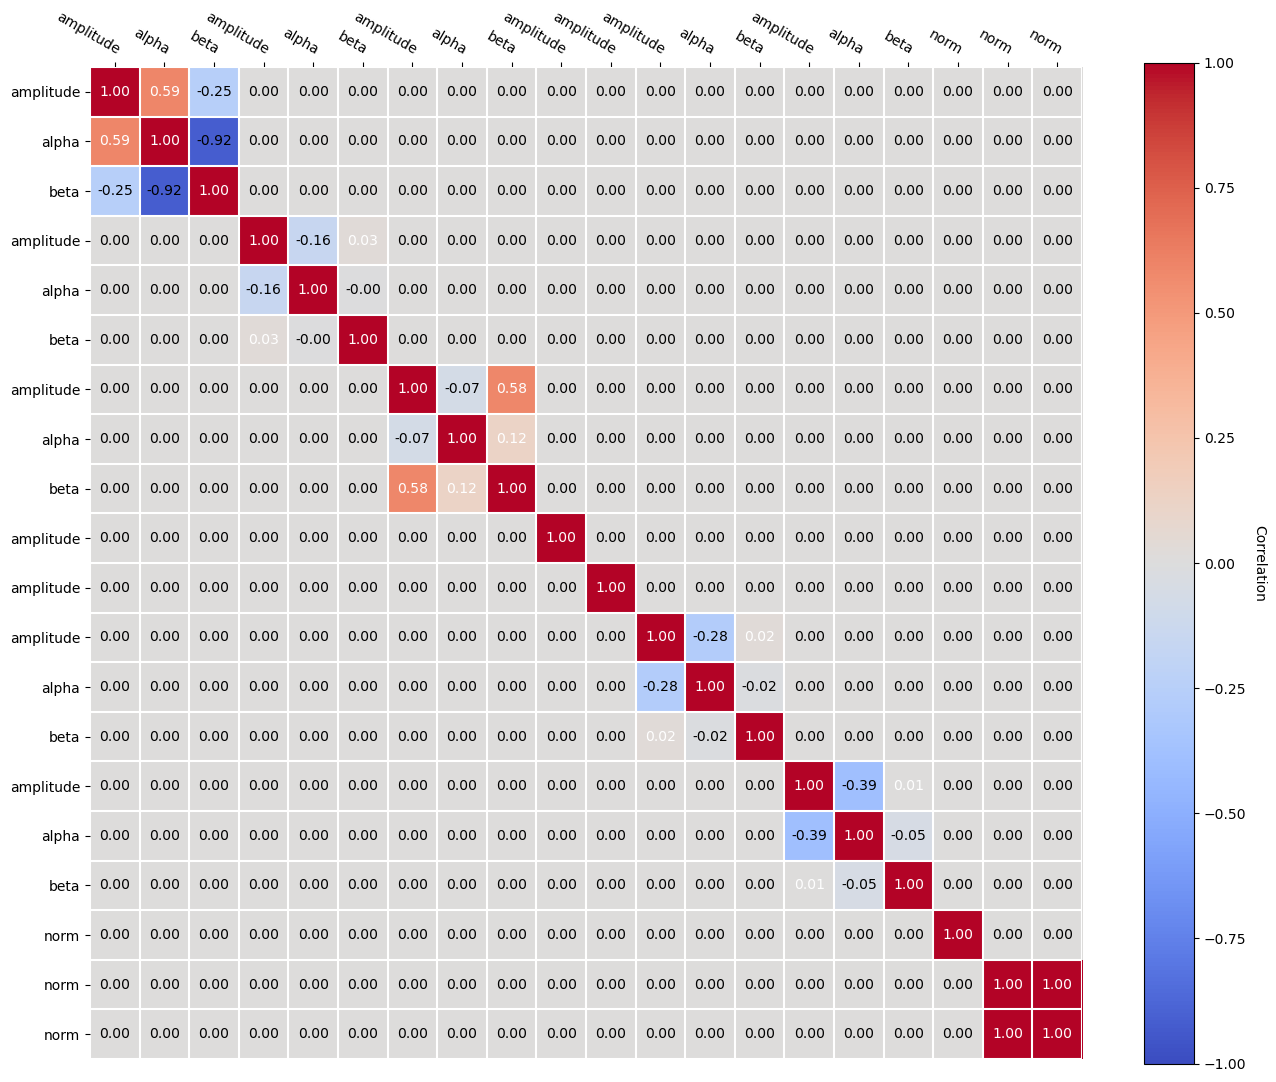

In [21]:
# analysis.final_model.covariance.plot_correlation()
analysis.final_model.covariance.get_subcovariance(
    analysis.final_model.parameters.free_parameters
).plot_correlation()

In [24]:
analysis.final_model[config_main.target.source_name]

SkyModel(spatial_model=<gammapy.modeling.models.spatial.PointSpatialModel object at 0x7f04646b1670>, spectral_model=<gammapy.modeling.models.spectral.CompoundSpectralModel object at 0x7f04646a5e50>)temporal_model=None)

In [25]:
if len(analysis.final_model[config_main.target.source_name].parameters)> 3:
    nrow = int(np.sqrt(len(analysis.final_model[config_main.target.source_name].parameters)))
    ncol = int(np.ceil(len(analysis.final_model[config_main.target.source_name].parameters)/nrow))
else:
    ncol = len(analysis.final_model[config_main.target.source_name].parameters)
    nrow = 1
print(ncol, nrow)

4 2


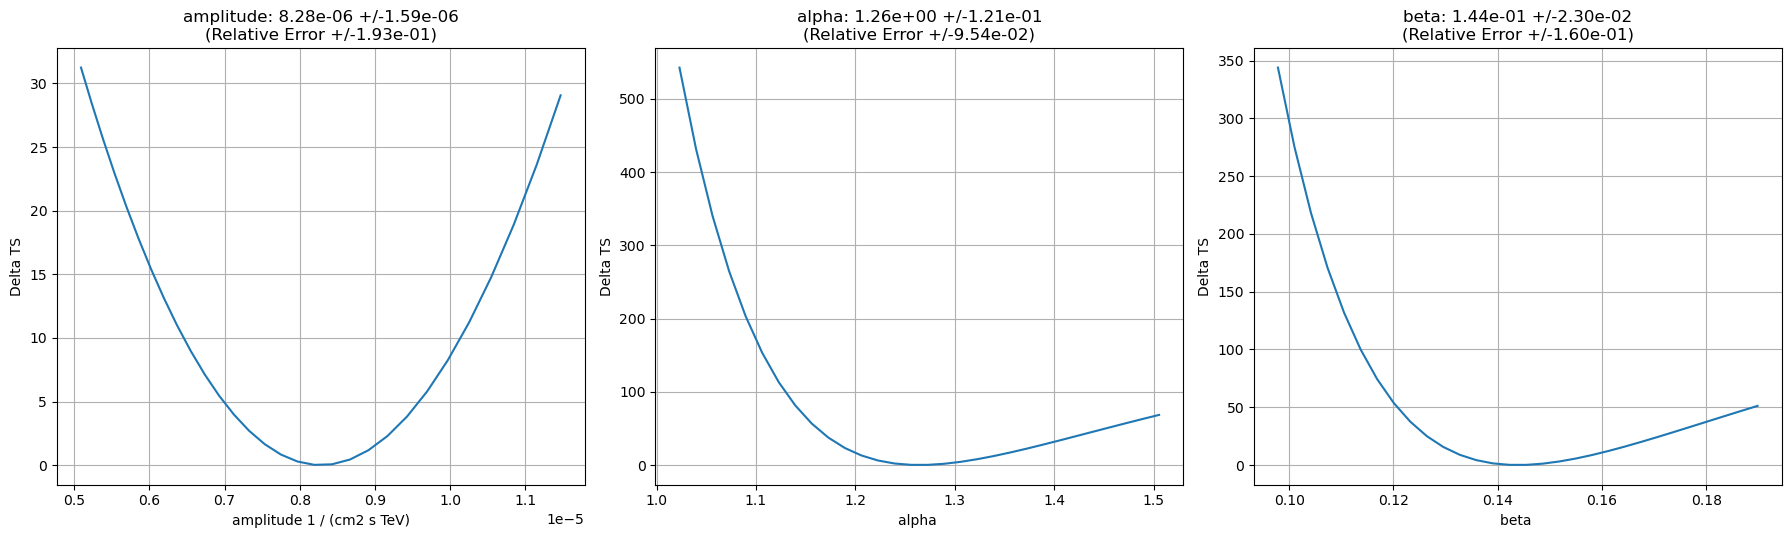

In [27]:
plt.figure(figsize=(ncol*6, nrow*5))
total_stat = analysis.fit_result.total_stat

for i, par in enumerate(analysis.final_model[config_main.target.source_name].parameters.free_parameters):
    par.scan_n_values = 30
    
    idx = analysis.final_model[config_main.target.source_name].parameters.index(par)
    name = Models(analysis.final_model[config_main.target.source_name]).parameters_unique_names[idx]
    
    profile = analysis.fit.stat_profile(datasets=analysis.datasets, parameter=par)
    
    plt.subplot(nrow, ncol, i+1)
    plt.plot(profile[f"{name}_scan"], profile["stat_scan"] - total_stat)
    
    plt.xlabel(f"{par.name} {par.unit}")
    plt.ylabel("Delta TS")
    plt.grid()
    if par.value != 0:
        plt.title(f"{par.name}: {par.value:.2e} +/-{par.error:.2e}\n(Relative Error +/-{par.error/par.value:.2e})")
    else:
        plt.title(f"{par.name}: {par.value:.2e} +/-{par.error:.2e}")
plt.tight_layout()

In [22]:
for fp in analysis.flux_points:
    print(fp)

FluxPoints
----------

  geom                   : RegionGeom
  axes                   : ['lon', 'lat', 'energy']
  shape                  : (1, 1, 8)
  quantities             : ['norm', 'norm_err', 'norm_errn', 'norm_errp', 'norm_ul', 'ts', 'npred', 'npred_excess', 'stat', 'counts', 'success', 'stat_scan']
  ref. model             : compound
  n_sigma                : 1
  n_sigma_ul             : 2
  sqrt_ts_threshold_ul   : 2
  sed type init          : likelihood

FluxPoints
----------

  geom                   : RegionGeom
  axes                   : ['lon', 'lat', 'energy']
  shape                  : (1, 1, 15)
  quantities             : ['norm', 'norm_err', 'norm_errn', 'norm_errp', 'norm_ul', 'ts', 'npred', 'npred_excess', 'stat', 'counts', 'success', 'stat_scan']
  ref. model             : compound
  n_sigma                : 1
  n_sigma_ul             : 2
  sqrt_ts_threshold_ul   : 2
  sed type init          : likelihood



In [23]:
analysis.flux_points[0].to_table(formatted=True, sed_type="e2dnde")

e_ref,e_min,e_max,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,is_ul,counts,success,norm_scan,stat_scan
MeV,MeV,MeV,MeV2 / (cm2 s TeV),MeV2 / (cm2 s TeV),MeV2 / (cm2 s TeV),MeV2 / (cm2 s TeV),MeV2 / (cm2 s TeV),,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[1],float32[1],float64,bool,float64[1],bool,float64[11],float64[11]
212.793,150.356,301.159,1.411e+02,1.253e+01,1.291e+01,1.217e+01,1.678e+02,12529.422,111.935,126.90687983926644,126.906876,15101.599,False,240.0,True,0.200 .. 5.000,15318.312 .. 15655.432
537.267,301.159,958.485,1.056e+02,1.046e+01,1.080e+01,1.011e+01,1.279e+02,9758.038,98.783,102.01263150150798,102.012634,13498.071,False,202.0,True,0.200 .. 5.000,13643.181 .. 14095.747
1709.938,958.485,3050.531,1.043e+02,1.629e+01,1.716e+01,1.546e+01,1.405e+02,3857.726,62.111,40.964445249181416,40.964447,5007.226,False,77.0,True,0.200 .. 5.000,5077.498 .. 5184.604
5442.150,3050.531,9708.801,1.092e+02,2.917e+01,3.183e+01,2.663e+01,1.783e+02,1275.066,35.708,13.999761873244232,13.999763,1142.648,False,21.0,True,0.200 .. 5.000,1173.726 .. 1177.261
17320.508,9708.801,30899.800,7.091e+01,4.094e+01,4.917e+01,3.347e+01,1.869e+02,259.304,16.103,2.999931143343465,2.9999306,86.084,False,3.0,True,0.200 .. 5.000,92.170 .. 95.309
55125.267,30899.800,98343.520,6.932e+01,6.946e+01,9.491e+01,4.882e+01,3.150e+02,99.635,9.982,0.9915467962943972,0.9915466,15.494,False,1.0,True,0.200 .. 5.000,18.235 .. 16.773
175444.922,98343.520,312993.888,1.050e-07,6.421e-03,9.818e+01,nan,3.927e+02,-0.000,0.000,5.347044263548435e-10,5.3470445e-10,0.000,True,0.0,True,0.200 .. 5.000,0.029 .. 0.715
558381.346,312993.888,996152.768,3.237e-09,1.272e-03,1.250e+02,nan,4.999e+02,-0.000,0.000,1.2950167898545868e-11,1.2950167e-11,0.000,True,0.0,True,0.200 .. 5.000,0.001 .. 0.017


In [24]:
analysis.flux_points[1].to_table(formatted=True, sed_type="e2dnde")

e_ref,e_min,e_max,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,is_ul,counts,success,norm_scan,stat_scan
TeV,TeV,TeV,TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[1],float32[1],float64,bool,float64[1],bool,float64[11],float64[11]
0.013,0.010,0.016,1.640e-11,1.640e-11,2.226e-11,1.323e-11,7.387e-11,1.386,1.177,0.9999159388202442,0.99991596,0.000,True,1.0,True,0.200 .. 5.000,0.082 .. 29.206
0.020,0.016,0.025,2.423e-11,3.558e-11,3.558e-11,nan,9.538e-11,0.464,0.681,39036.024217910235,190.04832,0.000,True,39036.0,True,0.200 .. 5.000,0.147 .. 45.675
0.032,0.025,0.040,3.586e-11,1.707e-11,1.714e-11,1.714e-11,7.003e-11,4.346,2.085,494947.45688907785,2078.8992,0.000,False,494944.0,True,0.200 .. 5.000,2.415 .. 125.008
0.050,0.040,0.063,3.671e-11,8.324e-12,8.286e-12,8.285e-12,5.325e-11,19.602,4.427,569191.7286111013,4717.443,0.000,False,569190.0,True,0.200 .. 5.000,12.345 .. 339.119
0.079,0.063,0.100,3.801e-11,5.868e-12,5.880e-12,5.880e-12,4.977e-11,41.786,6.464,363399.0264955552,5490.0527,0.000,False,363399.0,True,0.200 .. 5.000,29.660 .. 360.458
0.126,0.100,0.158,2.402e-11,3.467e-12,3.468e-12,3.468e-12,3.096e-11,47.966,6.926,141701.00371841242,3663.0073,0.000,False,141701.0,True,0.200 .. 5.000,32.528 .. 557.811
0.200,0.158,0.251,1.123e-11,1.677e-12,1.678e-12,1.678e-12,1.459e-11,44.817,6.695,39112.03992779276,1850.078,0.000,False,39112.0,True,0.200 .. 5.000,28.575 .. 726.084
0.316,0.251,0.398,3.176e-12,7.371e-13,7.371e-13,7.370e-13,4.650e-12,18.569,4.309,9541.003875330985,586.0075,0.000,False,9541.0,True,0.200 .. 5.000,10.938 .. 424.018


Text(0.5, 1.0, 'TS Profiles')

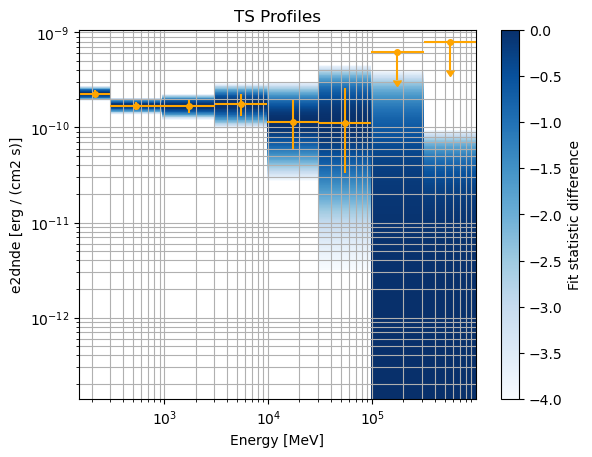

In [25]:
analysis.flux_points[0].plot_ts_profiles(sed_type="e2dnde")
analysis.flux_points[0].plot(sed_type="e2dnde", color="orange")

plt.grid(which='both')
plt.title('TS Profiles')

Text(0.5, 1.0, 'TS Profiles')

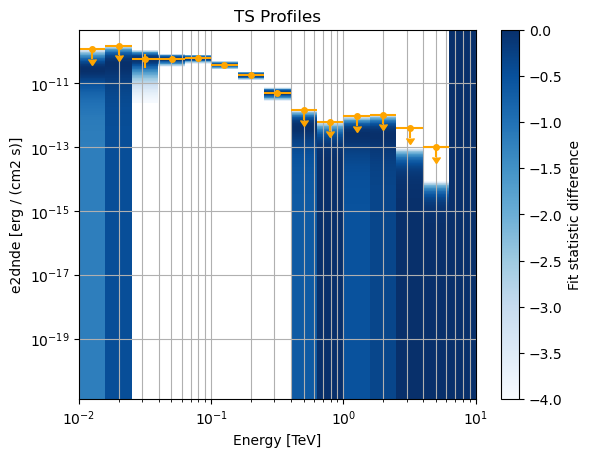

In [26]:
analysis.flux_points[1].plot_ts_profiles(sed_type="e2dnde")
analysis.flux_points[1].plot(sed_type="e2dnde", color="orange")

plt.grid(which='both')
plt.title('TS Profiles')

In [27]:
e_plot_min = 70 * u.MeV
e_plot_max = 70 * u.TeV

sed_kwargs = {
    "sed_type": "e2dnde",
    "energy_bounds": [e_plot_min, e_plot_max]
}
sed_plot_kwargs = {
    "sed_type": "e2dnde",
}

In [28]:
# Calculate & plot Crab reference flux
# https://doi.org/10.1016/j.jheap.2015.01.002
crab = create_crab_spectral_model("magic_lp")
crab.amplitude.error = 0.03e-11 * u.Unit("cm-2 s-1 TeV-1")
crab.alpha.error = 0.01
crab.beta.error = 0.01/np.log(10)

#flux_crab, flux_crab_error = crab.integral_error(e_lc_min, e_lc_max)
#print(flux_crab, flux_crab_error)

(1e-15, 1e-08)

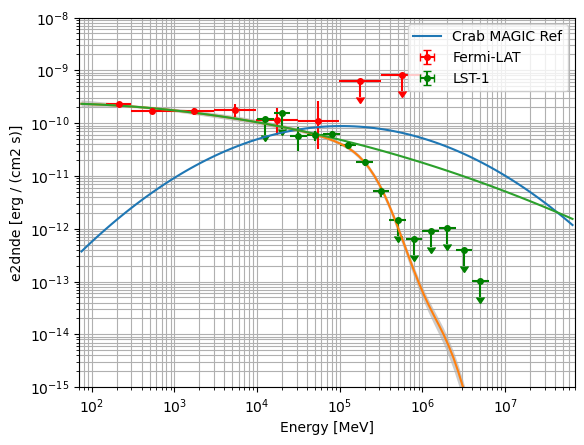

In [29]:
analysis.flux_points[0].plot(sed_type="e2dnde", color="red", label="Fermi-LAT")
analysis.flux_points[1].plot(sed_type="e2dnde", color="green", label="LST-1")

create_crab_spectral_model("magic_lp").plot(
    **sed_kwargs, label="Crab MAGIC Ref"
)
analysis.final_model[0].spectral_model.plot(**sed_kwargs)
analysis.final_model[0].spectral_model.model1.plot(**sed_kwargs)
analysis.final_model[0].spectral_model.plot_error(**sed_kwargs)

plt.grid(which="both")
plt.legend()
plt.xlim(e_plot_min, e_plot_max)
plt.ylim(1e-15, 1e-8)